# Finding an Appropriate Environment for Aquatic Life Forms

>CalCOFI conducts quarterly cruises off southern & central California, collecting a suite of hydrographic and biological data on station and underway. Data collected at depths down to 500 m include: temperature, salinity, oxygen, phosphate, silicate, nitrate and nitrite, chlorophyll, transmissometer, PAR, C14 primary productivity, phytoplankton biodiversity, zooplankton biomass, and zooplankton biodiversity.
>
>[Dataset at Kaggle](https://www.kaggle.com/sohier/calcofi "https://www.kaggle.com/sohier/calcofi"),
>[Column Description (1)](http://www.sarasota.wateratlas.usf.edu/library/learn-more/learnmore.aspx?toolsection=lm_dissolvedox "http://www.sarasota.wateratlas.usf.edu/library/learn-more/learnmore.aspx?toolsection=lm_dissolvedox"),
>[Column Description (2)]( https://new.data.calcofi.org/index.php/database/calcofi-database/cast-table-column-descriptions " https://new.data.calcofi.org/index.php/database/calcofi-database/cast-table-column-descriptions")

Salinity is a great predictor of preffered environment for all kinds of life forms as it impacts their vital life funcions. The issue is a measuring unit in the dataset, incongruent with google's matches for animal's salinity preference. Can I overcome that?

##  Libraries and Housekeeping

Importing libraries, supressing errors, and other miscallenous processes

In [110]:
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')

In [306]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import PredictionError

In [112]:
pd.set_option('display.max_columns', 100)

## Loading and inspecting the data

In [113]:
water = pd.read_csv(r"C:\Users\Henryk-Mariusz\Desktop\Spyder Scripts\datasets\CalCOFI water\bottle.csv",
                    low_memory=False)

In [114]:
water.describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,T_qual,S_prec,S_qual,P_qual,O_qual,SThtaq,O2Satq,ChlorA,Chlqua,Phaeop,Phaqua,PO4uM,PO4q,SiO3uM,SiO3qu,NO2uM,NO2q,NO3uM,NO3q,NH3uM,NH3q,C14As1,C14A1p,C14A1q,C14As2,C14A2p,C14A2q,DarkAs,DarkAp,DarkAq,MeanAs,MeanAp,MeanAq,LightP,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_NH4,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,864863.000000,864863.000000,864863.000000,853900.000000,817509.000000,696201.000000,812174.000000,661274.000000,661268.000000,118667.000000,864863.000000,853900.000000,23127.000000,817509.000000,74914.000000,673755.000000,184676.000000,65823.00000,217797.000000,225272.000000,639166.000000,225271.000000,639170.000000,413317.000000,451786.000000,354091.000000,510866.000000,337576.000000,529474.000000,337403.000000,529933.000000,64962.000000,808299.000000,14432.000000,12760.000000,848605.000000,14414.000000,12742.000000,848623.000000,22649.000000,20457.000000,840440.000000,22650.000000,20457.000000,840439.000000,18651.000000,864863.000000,853900.000000,818816.000000,817509.000000,812007.000000,812092.000000,818206.000000,696201.000000,666448.000000,354099.000000,413325.000000,337411.000000,337584.000000,64982.000000,225276.000000,225275.000000,864863.000000,122006.000000,1999.000000,224.000000,2084.000000,234.000000,10.000000,84.000000
mean,17138.790958,432432.000000,226.831951,10.799677,33.840350,3.392468,25.819394,57.103779,148.808694,10.497426,4.700273,2.017148,7.471829,2.716787,7.945057,8.999996,8.755615,8.46701,8.793487,0.450185,8.999848,0.198553,8.999844,1.564747,8.999320,26.606587,8.999687,0.042316,8.995458,17.302247,8.993122,0.084877,8.947668,9.757704,1.266928,8.999992,9.762613,1.267776,8.999992,0.155295,1.993450,8.999992,8.393530,1.256587,8.999992,18.356509,226.832495,10.799697,10.842295,33.840295,25.811010,220.938918,0.431763,3.392498,57.192940,26.606862,1.564736,17.302188,0.042336,0.084851,0.450225,0.198599,228.395694,162.071521,2153.239714,2168.148330,2256.055845,2278.858803,7.948570,7.910983
std,10240.949817,249664.587267,316.050259,4.243825,0.461843,2.073256,1.167787,37.094137,90.187533,6.189688,1.877428,0.148498,1.483097,0.450559,1.415355,0.003655,0.810973,1.11778,0.892111,1.208570,0.012318,0.376543,0.012507,1.035966,0.026895,27.648190,0.018768,0.104196,0.077426,14.581958,0.131516,0.273061,0.508844,23.983492,0.442372,0.002872,25.064529,0.442817,0.002872,0.224953,0.080671,0.002886,21.516374,0.436760,0.002886,29.852839,316.050007,4.243829,4.236435,0.462978,1.124645,93.483703,0.382336,2.073271,37.060537,27.648403,1.035973,14.581998,0.104201,0.273022,1.208566,0.376539,319.456731,85.722796,112.995202,154.852332,34.844435,58.496495,0.021216,0.077666
min,1.000000,1.000000,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,0.000000,3.000000,1.000000,6.000000,2.000000,6.000000,6.000000,6.000000,6.00000,2.000000,-0.001000,8.000000,-3.890000,8.000000,0.000000,4.000000,0.000000,4.000000,0.000000,4.000000,-0.400000,4.000000,0.000000,4.000000,-0.240000,1.000000,8.000000,-0.200000,1.000000,8.000000,-0.010000,1.000000,8.000000,-0.220000,1.000000,8.000000,0.000000,0.000000,1.440000,0.000000,4.570000,20.934000,0.400000,0.000000,-0.010000,-0.100000,0.000000,0.000000,-0.400000,0.000000,0.000000,-0.010000,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,8269.000000,216216.500000,46.000000,7.680000,33.488000,1.360000,24.965000,21.100000,60.915470,5.000000,3.000000,2.000000,6.000000,2.000000,6.000000,9.000000,9.000000,9.00000,9.000000,0.050000,9.000000,0.050000,9.000000,0.470000,9.000000,3.110000,9.000000,0.000000,9.000000,0.600000,9.000000,0.000000,9.000000,0.930000,1.000000,9.000000,0.930000,1.000000,9.000000,0.060000,2.000000,9.000000,0.980000,1.000000,9.000000,0.280000,46.000000,7.680000,7.740000,33.488000,24.960000,143.700000,0.130000,1.360000,21.200000,3.100000,0.470000,0.600000,0.000000,0.000000,

In [115]:
water.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,T_qual,S_prec,S_qual,P_qual,O_qual,SThtaq,O2Satq,ChlorA,Chlqua,Phaeop,Phaqua,PO4uM,PO4q,SiO3uM,SiO3qu,NO2uM,NO2q,NO3uM,NO3q,NH3uM,NH3q,C14As1,C14A1p,C14A1q,C14As2,C14A2p,C14A2q,DarkAs,DarkAp,DarkAq,MeanAs,MeanAp,MeanAq,IncTim,LightP,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_NH4,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,NaN,NaN,3,1.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,0.0,10.50,10.50,33.440,25.64,233.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,NaN,NaN,3,2.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,8.0,10.46,10.46,33.440,25.65,232.5,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,NaN,NaN,7,2.0,NaN,3.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,10.0,10.46,10.46,33.437,25.65,232.8,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,NaN,NaN,3,2.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,19.0,10.45,10.45,33.420,25.64,234.1,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,NaN,NaN,7,2.0,NaN,3.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,20.0,10.45,10.45,33.421,25.64,234.0,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
def get_info(df,k):
    """
    Prints .info() about % of missing values per each column 
    
        k:  float, flags columns with at least k*100% nulls
        
        df: pd.dataframe
    
    returns: list of columns with k*100% of nulls
    """
    print(f"Percentage of null values per column")
    count_null = df.isnull().sum() / len(df) #counts % of nulls
    print(count_null)
    count_col = len(df.columns)
    count_empty = len(count_null[count_null > k]) #counts columns with k*100% of nulls
    print(f"{count_col} columns, {count_empty} with at least {k*100}% of missing values")
    empty_columns = list(count_null[count_null > k].index) #gets columns names
    
    return empty_columnsF

In [117]:
empty_cols = get_info(water,0.25)

Percentage of null values per column
Cst_Cnt                0.000000
Btl_Cnt                0.000000
Sta_ID                 0.000000
Depth_ID               0.000000
Depthm                 0.000000
                         ...   
TA1                    0.997590
TA2                    0.999729
pH2                    0.999988
pH1                    0.999903
DIC Quality Comment    0.999936
Length: 74, dtype: float64
74 columns, 44 with at least 25.0% of missing values


There are many columns, as we suspected that have too many values missing and so they need to be removed. In that case rather than investigating it further and visualizing the data lets focus on removing some of them and implementing a strategy to deal with values that are below 25% of missing. But before we ventre any further, lets divide the dataset into train and test to avoid overfitting and model evaluation at the end of the project. 

## Dividing the data into train and test sets

With such a large dataset I'll focus on the random sampling as a variation between methods might be similar

In [118]:
X_train, X_test = train_test_split(water, test_size=0.2, random_state=0)

In [119]:
water_train = X_train.copy()

In [120]:
X_train_copy = X_train.copy()

In [121]:
#X_test.columns

## Null Handling

I'll implement two different approaches to handle null values, one at the column level and another at the row. This way I can save as much data as possible while controling the bias

#### Nulls in columns

Lets remove the columns that have more than 75% of missing data, non descriptive features, dublicates, categorical variables with highly unbalanced data

In [122]:
water_train.drop(axis=1,labels=empty_cols,inplace=True)

In [123]:
water_train.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,RecInd,T_prec,S_prec,P_qual,NH3q,C14A1q,C14A2q,DarkAq,MeanAq,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_PRES
52679,1705,52680,020.0 030.0,19-5008BD-HY-230-1606-02000300-0000B-3,0,17.31,31.460,4.78,22.728,86.1,208.73080,3,2.0,2.0,9.0,9.0,9.0,9.0,9.0,9.0,0.0,17.31,17.31,31.460,22.72,511.5,0.00,4.78,86.1,0
493513,19835,493514,116.7 050.0,19-7505JD-HY-155-1612-11670500-0200A-7,200,10.22,34.255,1.52,26.337,24.0,66.14124,7,2.0,3.0,9.0,9.0,9.0,9.0,9.0,9.0,200.0,10.22,10.20,34.255,26.33,172.3,0.50,1.52,24.0,201
237558,9071,237559,066.7 070.0,19-5707ST-HY-200-0206-06670700-0028A-3,28,14.73,33.220,6.09,24.660,105.3,265.43380,3,2.0,2.0,9.0,9.0,9.0,9.0,9.0,9.0,28.0,14.73,14.73,33.220,24.66,328.0,0.09,6.09,105.3,28
363234,13589,363235,100.0 060.0,19-6304AX-HY-126-0118-10000600-0274A-3,274,7.46,34.106,1.91,26.654,28.4,83.08602,3,2.0,3.0,9.0,9.0,9.0,9.0,9.0,9.0,274.0,7.46,7.43,34.106,26.65,142.3,0.61,1.91,28.4,276
644007,26380,644008,093.3 050.0,19-9003JD-HY-065-0700-09330500-0500A-7,500,6.53,34.315,0.32,26.949,4.7,13.91617,7,2.0,3.0,9.0,9.0,9.0,9.0,9.0,9.0,500.0,6.53,6.48,34.315,26.94,117.3,0.86,0.32,4.7,503


Looking at the dataset I see a lot of features name contains oxygen, I'd like to investigate their correlations between each other to determine if they're the same thing. If that's the case, removing them might be a good option since highly correlated features don't necessarily help with prediction of response variable. To avoid creating a large matrix, I'll investigate the O2Sat feature against all the others present.

In [124]:
water_corr = water_train.corr()

In [125]:
water_corr['O2Sat'].sort_values(ascending=False)

O2Sat          1.000000
R_O2Sat        0.999999
Oxy_µmol/Kg    0.993362
O2ml_L         0.993236
R_O2           0.993234
R_SVA          0.926796
R_POTEMP       0.851050
R_TEMP         0.850646
T_degC         0.850646
Cst_Cnt        0.136474
Btl_Cnt        0.134663
S_prec         0.021379
NH3q           0.012515
C14A1q        -0.004902
C14A2q        -0.004902
DarkAq        -0.004981
MeanAq        -0.004981
T_prec        -0.010156
RecInd        -0.066891
R_PRES        -0.594296
Depthm        -0.596100
R_Depth       -0.596100
R_DYNHT       -0.775722
R_SALINITY    -0.787812
Salnty        -0.790995
STheta        -0.865147
R_SIGMA       -0.928927
P_qual              NaN
Name: O2Sat, dtype: float64

Just as I thought, there are features that are highly correlated with oxygen that hold the name of O2 in the name, I'll remove them since they create an issue of multicollinearity:
https://online.stat.psu.edu/stat501/lesson/12/12.3

In [126]:
corr_matr_index_drop = water_corr['O2Sat'].sort_values(ascending=False).index[1:5]

In [127]:
water_train.drop(axis=1,labels=corr_matr_index_drop, inplace=True)

In [128]:
water_train.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,STheta,O2Sat,RecInd,T_prec,S_prec,P_qual,NH3q,C14A1q,C14A2q,DarkAq,MeanAq,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_PRES
52679,1705,52680,020.0 030.0,19-5008BD-HY-230-1606-02000300-0000B-3,0,17.31,31.460,22.728,86.1,3,2.0,2.0,9.0,9.0,9.0,9.0,9.0,9.0,0.0,17.31,17.31,31.460,22.72,511.5,0.00,0
493513,19835,493514,116.7 050.0,19-7505JD-HY-155-1612-11670500-0200A-7,200,10.22,34.255,26.337,24.0,7,2.0,3.0,9.0,9.0,9.0,9.0,9.0,9.0,200.0,10.22,10.20,34.255,26.33,172.3,0.50,201
237558,9071,237559,066.7 070.0,19-5707ST-HY-200-0206-06670700-0028A-3,28,14.73,33.220,24.660,105.3,3,2.0,2.0,9.0,9.0,9.0,9.0,9.0,9.0,28.0,14.73,14.73,33.220,24.66,328.0,0.09,28
363234,13589,363235,100.0 060.0,19-6304AX-HY-126-0118-10000600-0274A-3,274,7.46,34.106,26.654,28.4,3,2.0,3.0,9.0,9.0,9.0,9.0,9.0,9.0,274.0,7.46,7.43,34.106,26.65,142.3,0.61,276
644007,26380,644008,093.3 050.0,19-9003JD-HY-065-0700-09330500-0500A-7,500,6.53,34.315,26.949,4.7,7,2.0,3.0,9.0,9.0,9.0,9.0,9.0,9.0,500.0,6.53,6.48,34.315,26.94,117.3,0.86,503


Also, lets look if we have any categorical features that are not refelcted in the .info() summary, perhaps we can see a pattern, and where we might think as continous and unique value for each row there could be bins that are more reflective of water testing procedurs.

In [129]:
for feature in water_train.columns:
    print(f"There are {len(water_train[feature].value_counts())} categories in {feature}" )

There are 34340 categories in Cst_Cnt
There are 691890 categories in Btl_Cnt
There are 2620 categories in Sta_ID
There are 691880 categories in Depth_ID
There are 3020 categories in Depthm
There are 13112 categories in T_degC
There are 13712 categories in Salnty
There are 30510 categories in STheta
There are 9793 categories in O2Sat
There are 5 categories in RecInd
There are 3 categories in T_prec
There are 2 categories in S_prec
There are 1 categories in P_qual
There are 2 categories in NH3q
There are 2 categories in C14A1q
There are 2 categories in C14A2q
There are 2 categories in DarkAq
There are 2 categories in MeanAq
There are 3020 categories in R_Depth
There are 2802 categories in R_TEMP
There are 2834 categories in R_POTEMP
There are 3487 categories in R_SALINITY
There are 4332 categories in R_SIGMA
There are 5185 categories in R_SVA
There are 1778 categories in R_DYNHT
There are 3110 categories in R_PRES


Since there are no significant informations contained in Btl_Cnt,Depth_ID; I'll remove them from the dataset. Also, since there are 23869 categories in feature Cst_Cnt it would create too many columns in `OneHotEncoding()`

In [130]:
insign_cols = ['Btl_Cnt', 'Depth_ID', 'Cst_Cnt']

In [131]:
water_train.drop(axis=1,labels=insign_cols,inplace=True)

I've removed further variables because there were doubles in a dataset that furth escallate the multicollieatiy issue

In [132]:
doubles_cols = ['Depthm','T_degC','R_POTEMP', 'R_SALINITY']

In [133]:
water_train.drop(axis=1,inplace=True, labels=doubles_cols)

In [134]:
for col in water_train.columns[8:17]:
    print(f"{water_train[col].value_counts()}")

9.0    639749
4.0      6749
Name: NH3q, dtype: int64
9.0    678838
8.0         6
Name: C14A1q, dtype: int64
9.0    678851
8.0         6
Name: C14A2q, dtype: int64
9.0    672335
8.0         6
Name: DarkAq, dtype: int64
9.0    672334
8.0         6
Name: MeanAq, dtype: int64
10.0      28128
20.0      26984
0.0       26639
30.0      26489
50.0      26013
          ...  
1705.0        1
1710.0        1
2315.0        1
3457.0        1
3407.0        1
Name: R_Depth, Length: 3020, dtype: int64
8.90     931
8.88     927
9.30     924
9.10     921
9.02     917
        ... 
30.20      1
28.13      1
30.25      1
30.06      1
25.68      1
Name: R_TEMP, Length: 2802, dtype: int64
26.970    3220
26.600    3159
26.610    3117
26.980    3109
26.580    3094
          ... 
23.564       1
23.688       1
23.123       1
27.335       1
27.163       1
Name: R_SIGMA, Length: 4332, dtype: int64
146.9    439
146.5    428
150.5    418
146.0    417
148.2    414
        ... 
601.5      1
498.6      1
582.2      1
5

The columns with small amount of categories are highly unbalanced, to the point of being a single category. In the scope of 700k observation these features are non predictive, in exception of T_prec which only measures the precision of measurement

In [135]:
unpredictive_cols = ['T_prec','C14A1q', 'MeanAq', 'DarkAq', 'C14A2q','P_qual','RecInd','NH3q','S_prec', 'R_SIGMA']

In [136]:
water_train.drop(axis=1,inplace=True, labels=unpredictive_cols)

In [137]:
water_train.head()

,Sta_ID,Salnty,STheta,O2Sat,R_Depth,R_TEMP,R_SVA,R_DYNHT,R_PRES
52679,020.0 030.0,31.460,22.728,86.1,0.0,17.31,511.5,0.00,0
493513,116.7 050.0,34.255,26.337,24.0,200.0,10.22,172.3,0.50,201
237558,066.7 070.0,33.220,24.660,105.3,28.0,14.73,328.0,0.09,28
363234,100.0 060.0,34.106,26.654,28.4,274.0,7.46,142.3,0.61,276
644007,093.3 050.0,34.315,26.949,4.7,500.0,6.53,117.3,0.86,503


which brings us to the Sta_ID with roughly 2620 categories which at some level seem too large to create seperate variables for the model to utilize. In this case I'd rather go with a simpler model and discard the feature.

In [138]:
stat_col = ["Sta_ID"]

In [139]:
water_train.drop(axis=1,inplace=True, labels=stat_col)

In [140]:
water_train.rename(mapper={'STheta': 'density',
                          'O2Sat': 'o2', 'R_Depth': 'depth',
                          'R_TEMP': 'temp', 'R_SVA': 'vol_anomaly',
                          'R_DYNHT': 'height', 'R_PRES': 'pressure',
                          'Salnty': 'salt'},axis=1,inplace=True)

In [141]:
water_train.head()

,salt,density,o2,depth,temp,vol_anomaly,height,pressure
52679,31.460,22.728,86.1,0.0,17.31,511.5,0.00,0
493513,34.255,26.337,24.0,200.0,10.22,172.3,0.50,201
237558,33.220,24.660,105.3,28.0,14.73,328.0,0.09,28
363234,34.106,26.654,28.4,274.0,7.46,142.3,0.61,276
644007,34.315,26.949,4.7,500.0,6.53,117.3,0.86,503


#### Nulls in rows

Now that the columns amounts are highly reduced, it's time to investigate a proper technique of remedying the missing values in the rows. Lets look again at amount of values missing

In [142]:
water_train.isna().sum() / len(water_train)

salt           0.054715
density        0.060838
o2             0.235321
depth          0.000000
temp           0.012593
vol_anomaly    0.060948
height         0.053931
pressure       0.000000
dtype: float64

I'll investigate distributions to come up with an optimal strategy, instead of simply removing, which would create a bias on the data

array([[<AxesSubplot:title={'center':'salt'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'o2'}>],
       [<AxesSubplot:title={'center':'depth'}>,
        <AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'vol_anomaly'}>],
       [<AxesSubplot:title={'center':'height'}>,
        <AxesSubplot:title={'center':'pressure'}>, <AxesSubplot:>]],
      dtype=object)

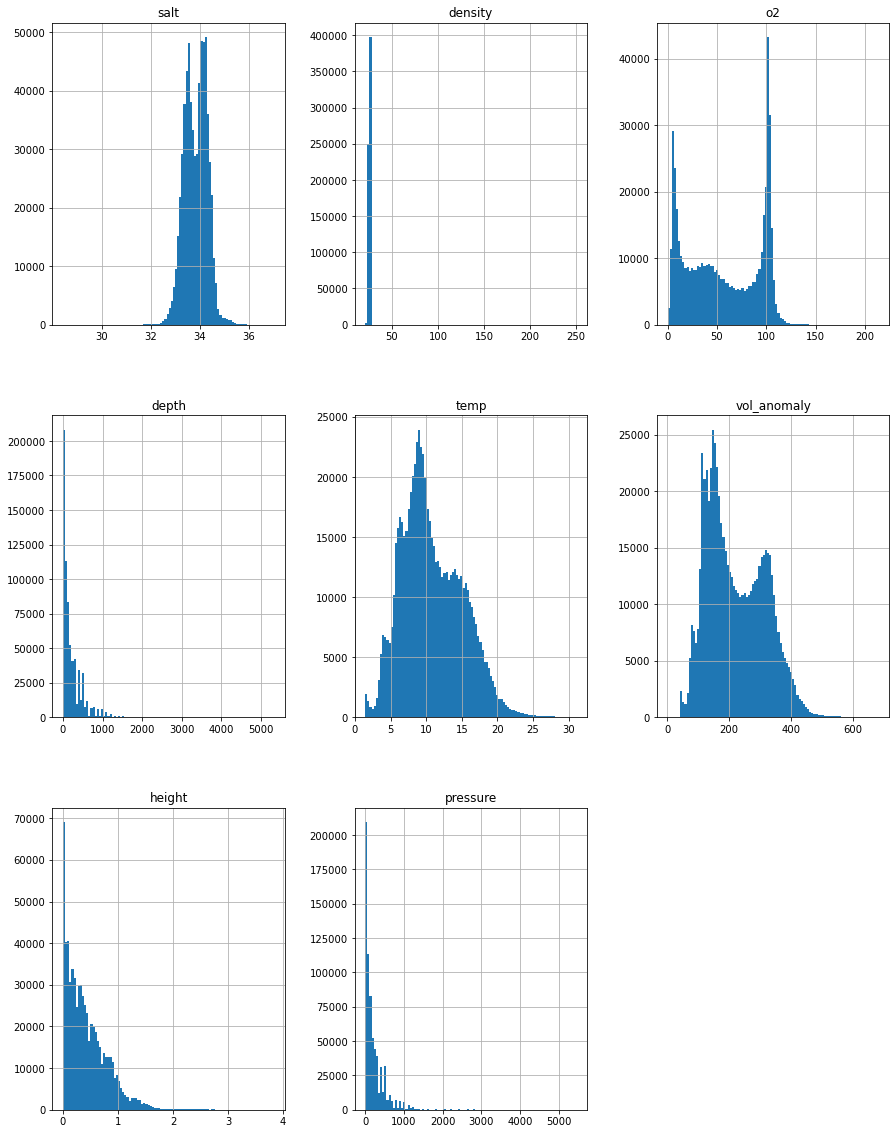

In [143]:
water_train.hist(bins=100, figsize=(15,20))

The histograms seem multimodal with positive skew, which makes the imputing based on mean inadequate, median might be a better option but instead I'll use KNN imputer, which will predict missing values based on the neighbors it has

In [144]:
imputer_knn = KNNImputer(n_neighbors=8, weights='distance')

In [145]:
#imputer_knn.fit_transform(water_train) 
###MemoryError: Unable to allocate 861. GiB for an array with shape (167113, 691890) and data type float64
#I'll abort that procedure


There isn't enough computing power to perform that operation. Instead I'll use a different approach, an iterative imputer which will start from the column that has the least amount of missing values and move to the next smallest, until it reaches the final column with largest amount of missing values; in this example, o2.

In [146]:
imputer_iter = IterativeImputer(estimator=BayesianRidge())

In [147]:
water_train_imputed = imputer_iter.fit_transform(water_train)

C:\Users\Henryk-Mariusz\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:637: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [148]:
water_train = pd.DataFrame(water_train_imputed, columns=water_train.columns)

In [149]:
get_info(water_train,0.25)

Percentage of null values per column
salt           0.0
density        0.0
o2             0.0
depth          0.0
temp           0.0
vol_anomaly    0.0
height         0.0
pressure       0.0
dtype: float64
8 columns, 0 with at least 25.0% of missing values


[]

The imputation worked, lets move forward with the analysis

## Splitting the data into independent  and dependent sets

I waited this long to perform that operation because I've tried different places, eventually concluded that since there's roughly 25% of missing data in dependent variable I don't want to remove it such a large chunk, and instead I'll perform an iterative procedure which estimates the lowest missing count and climbs up all the way to the column with the highest missing amount. If I split the data before this method would be not available, and instead I'll have to resort to a simple imputer, or perhaps to remove observations.

In [150]:
water_train.columns

Index(['salt', 'density', 'o2', 'depth', 'temp', 'vol_anomaly', 'height',
       'pressure'],
      dtype='object')

In [151]:
y_train =  water_train['salt']
water_train_data = water_train.drop(['salt'], inplace=False, axis=1)

In [153]:
X_test.rename(mapper={'STheta': 'density',
                          'O2Sat': 'o2', 'R_Depth': 'depth',
                          'R_TEMP': 'temp', 'R_SVA': 'vol_anomaly',
                          'R_DYNHT': 'height', 'R_PRES': 'pressure',
                          'Salnty': 'salt'},axis=1,inplace=True)

C:\Users\Henryk-Mariusz\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [154]:
X_test_data = X_test.drop(['salt'],axis=1,inplace=False)

In [156]:
y_test = X_test['salt']

## Visualization and Transformation

I'll focus on the inspection of visuals and implementation of remedial measures. Previously I looked at the histograms and concluded there's skeweness as well as multimodality. I'd like to come up with strategies to overcome that. Before I proceed I'd like standardize the data to be plotted in the same axes.

In [157]:
scaler = StandardScaler()

In [158]:
scaler.fit(water_train_data)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [159]:
water_train_scaled = scaler.transform(water_train_data)

In [160]:
water_trained_columns = water_train.drop(labels='salt',axis=1,inplace=False).columns

In [161]:
water_train_data = pd.DataFrame(water_train_scaled, columns=water_trained_columns)

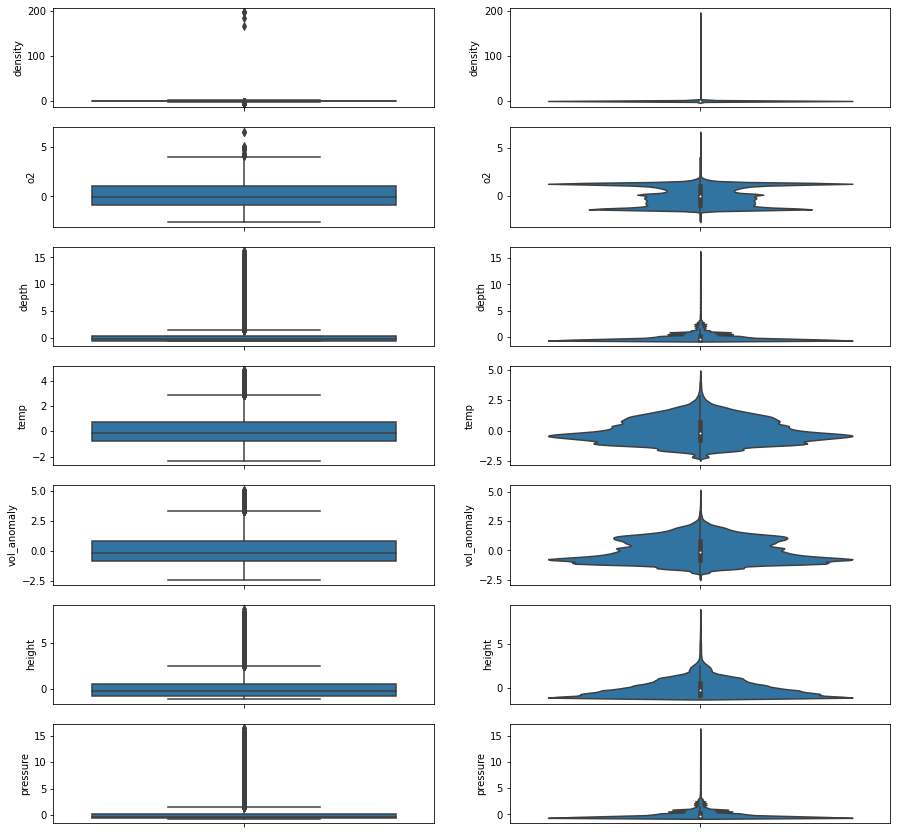

In [162]:
columns = water_train_data.columns
col_count = len(columns)

#Add x=var for differentiation across the x axis

fig, axes = plt.subplots(col_count, 2, figsize=(15, 15))

for row, var in enumerate(columns):
    sns.boxplot(y=var, data=water_train_data, ax=axes[row, 0])
    sns.violinplot(y=var, data=water_train_data, ax=axes[row, 1])

plt.show()

There seem to be an impact of outliers, it's especially visible when looking at the boxplots. I'll use quantile transformation to both, improve the normaltiy which seems violated in violinplots, and the outliers. 

The above violin plots capture the skewness, multimodality, as well as overall distribution of values. To remedy that I'd like to apply quantile transformation that will shrink perhaps present residuals

In [163]:
water_train_data.skew()

density        48.727645
o2              0.018538
depth           4.501186
temp            0.484147
vol_anomaly     0.426892
height          1.536239
pressure        4.541542
dtype: float64

In [164]:
qt_transf = QuantileTransformer(random_state=42, output_distribution='normal')

In [165]:
water_train_temp = qt_transf.fit_transform(water_train_data)

In [166]:
#water_train_qt = quantile_transform(water_train, random_state=42, output_distribution='normal', copy=True)

In [167]:
water_train_qt = pd.DataFrame(water_train_temp, columns=water_train_data.columns)

In [168]:
water_train = water_train_qt

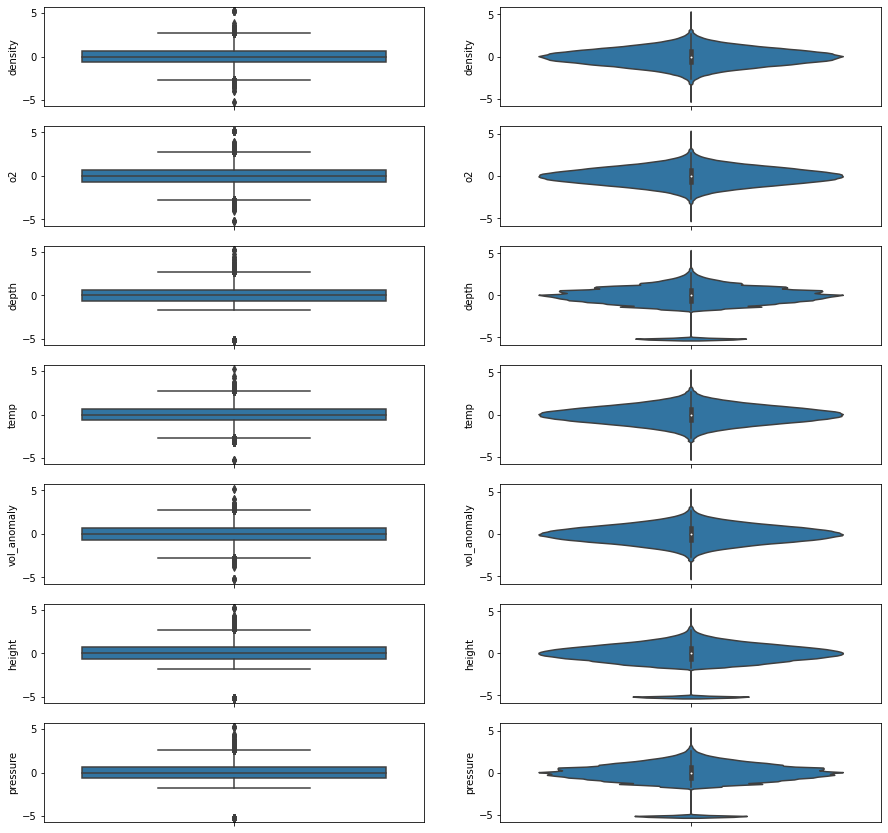

In [169]:
columns = water_train.columns
col_count = len(columns)

#Add x=var for differentiation across the x axis

fig, axes = plt.subplots(col_count, 2, figsize=(15, 15))

for row, var in enumerate(columns):
    sns.boxplot(y=var, data=water_train, ax=axes[row, 0])
    sns.violinplot(y=var, data=water_train, ax=axes[row, 1])

plt.show()

In [170]:
water_train.skew()

density       -0.010647
o2             0.005922
depth         -1.749557
temp          -0.000019
vol_anomaly    0.002388
height        -1.719534
pressure      -1.739826
dtype: float64

## Outliers

There's a slight improvement in skeweness and an amazing outcome in multimodality reduction and general distribution that seems normal. However, there seem to exist outliers(under performers) in features depth, height, pressure and I'd like to address those further. At some level I'm amazed that quartile transform didn't squish those observations

In [171]:
outliers_pressure = water_train[water_train['pressure'] < -4]

In [172]:
len(outliers_pressure)

26639

<AxesSubplot:>

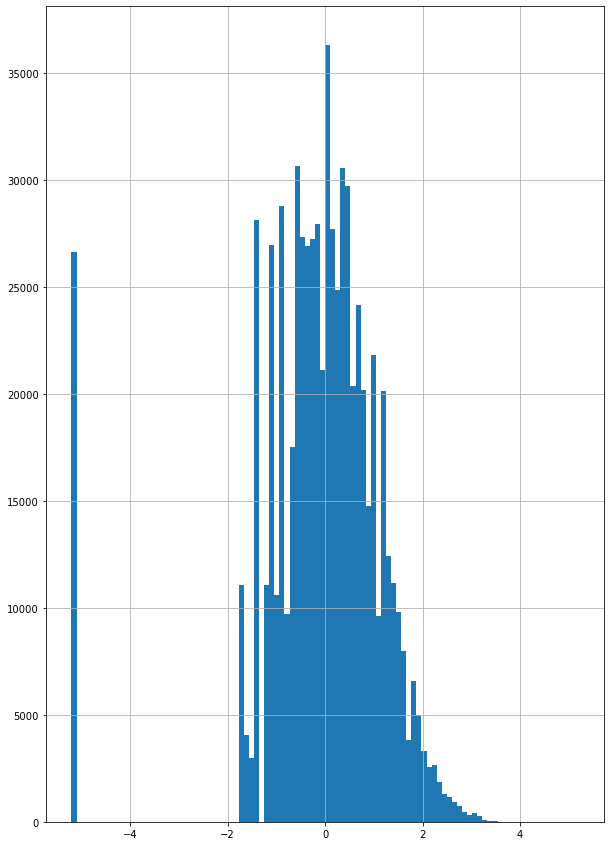

In [173]:
water_train.pressure.hist(bins=100,figsize=(10,15))

In [174]:
outliers_depth = water_train[water_train.depth < -4] 

In [175]:
len(outliers_depth)

26639

<AxesSubplot:>

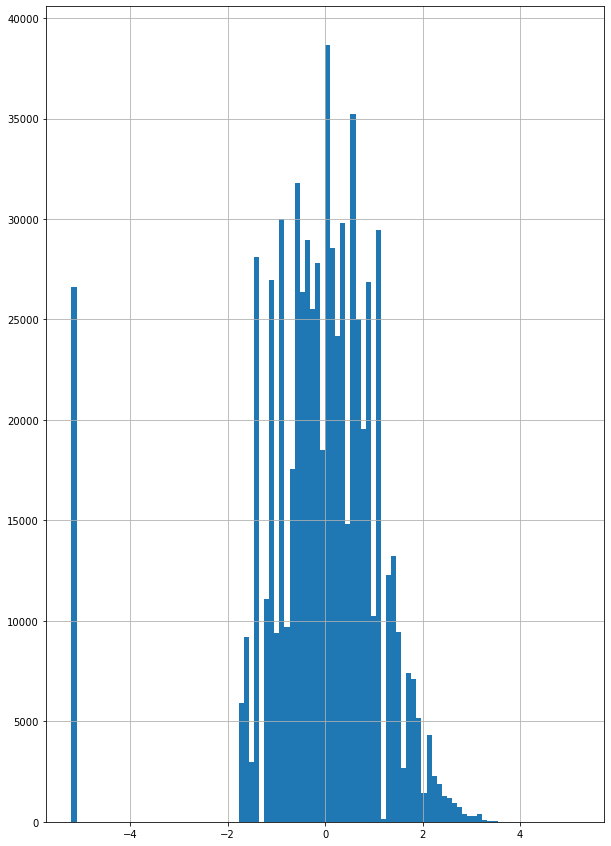

In [176]:
water_train.depth.hist(bins=100,figsize=(10,15))

In [179]:
water_train['salt'] = y_train

To avoid splitting back and forth, I can reorder the columns to have a response variable on the top of the list, it won't change the order

In [180]:
outliers_height = water_train[water_train.height < -4]

In [181]:
len(outliers_height)

25917

<AxesSubplot:>

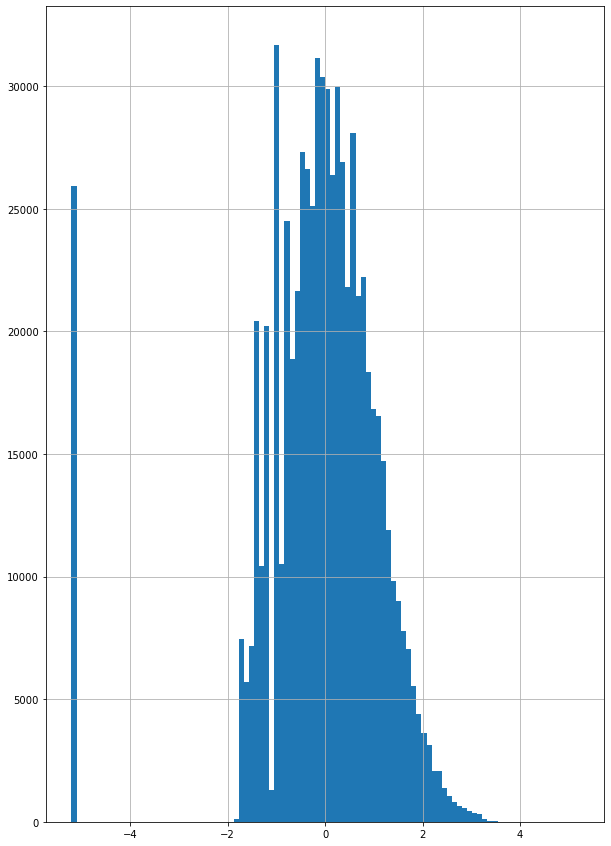

In [182]:
water_train.height.hist(bins=100,figsize=(10,15))

It seems each of the three columns contains roughly the same amount of outliers, and their distributions looks quite alike. I would judghe they're highly correlated and would eventually cause the multicollinearity issue down the line. Also, since the outliers seem to appear only to the left skew, which seemingly seem discountinued I would say that the specific station caused an error in measurement. 

In [183]:
water_train_no_outliers = water_train[water_train.pressure > -4]

In [184]:
water_train_no_outliers.skew()

density       -0.008662
o2             0.011382
depth          0.294381
temp           0.004439
vol_anomaly    0.001503
height         0.279194
pressure       0.293903
salt          -0.025590
dtype: float64

This took care of the outliers causing skewness with removing observations that are smaller than 4 SD's from the mean

That brings me to another step, investigating correlations as I obsrved common distributions shapes in features density, depth, pressure, and height. At some level I'm already suspecting them to be highly correlated since a pressure is a function of height, depth, and density of the water seems related to it as well

In [185]:
corr_water = water_train.corr()

<AxesSubplot:>

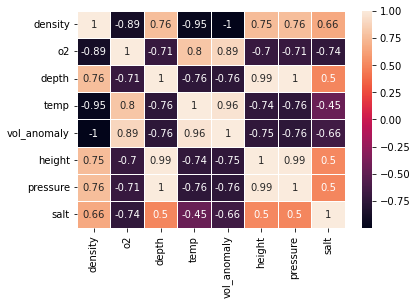

In [186]:
sns.heatmap(corr_water,
           xticklabels=corr_water.columns,
           yticklabels=corr_water.columns,
           annot=True, linewidths=0.5)

Just as we thought, by looking at the correlation heatmap we can see that height and pressure, height and depth are the same thing. Lets leave it for now, as I'd like to explore feature importance later on and experiment with yellowbrick library that gives more visual representation

In [187]:
def get_vif(exogs, data):
    '''Return VIF (variance inflation factor) DataFrame

    Args:
    exogs (list): list of exogenous/independent variables
    data (DataFrame): the df storing all variables

    Returns:
    VIF and Tolerance DataFrame for each exogenous variable

    Notes:
    Assume we have a list of exogenous variable [X1, X2, X3, X4].
    To calculate the VIF and Tolerance for each variable, we regress
    each of them against other exogenous variables. For instance, the
    regression model for X3 is defined as:
                        X3 ~ X1 + X2 + X4
    And then we extract the R-squared from the model to calculate:
                    VIF = 1 / (1 - R-squared)
                    Tolerance = 1 - R-squared
    The cutoff to detect multicollinearity:
                    VIF > 10 or Tolerance < 0.1
    '''

    # initialize dictionaries
    vif_dict, tolerance_dict = {}, {}

    # create formula for each exogenous variable
    for exog in exogs:
        not_exog = [i for i in exogs if i != exog]
        formula = f"{exog} ~ {' + '.join(not_exog)}"

        # extract r-squared from the fit
        r_squared = smf.ols(formula, data=data).fit().rsquared

        # calculate VIF
        vif = 1/(1 - r_squared)
        vif_dict[exog] = vif

        # calculate tolerance
        tolerance = 1 - r_squared
        tolerance_dict[exog] = tolerance

    # return VIF DataFrame
    df_vif = pd.DataFrame({'VIF': vif_dict, 'Tolerance': tolerance_dict})

    return df_vif


In [188]:
water_train = water_train_no_outliers.copy()

In [189]:
exogs = water_train.columns

In [190]:
vifs = get_vif(exogs=exogs,data=water_train)

In [191]:
vifs

,VIF,Tolerance
density,1976.728882,0.000506
o2,6.117945,0.163454
depth,3544.479673,0.000282
temp,57.236682,0.017471
vol_anomaly,2231.612029,0.000448
height,47.980033,0.020842
pressure,3383.210572,0.000296
salt,7.590755,0.131739


In [192]:
X_train = water_train.drop(['salt'], axis=1, inplace=False)
y_train = water_train.salt

Just as I thought. Instead of proceeding to remove the most severe features lets keep in mind that some regression models are robust and handle multicollinearity much better. 

## Making a Pipeline and Prepping test set

Before I jump into the model selection lets prepare a pipeline that'll create all the necessary transformations for the test set, and develop a practice in pipeline creation. Getting familiar with the process of creating pipelines will help me get familiar with the procedure and eventually lead me down the path of a better automation of the procedures

There is a list of columns to be removed before it goes to the pipeline

In [193]:
rm_cols = (list(corr_matr_index_drop) + list(empty_cols) + list(insign_cols) + 
           list(doubles_cols) + list(unpredictive_cols) + stat_col)

In [194]:
X_test_data.rename(mapper={'STheta': 'density',
                          'O2Sat': 'o2', 'R_Depth': 'depth',
                          'R_TEMP': 'temp', 'R_SVA': 'vol_anomaly',
                          'R_DYNHT': 'height', 'R_PRES': 'pressure',
                          'Salnty': 'salt'},axis=1,inplace=True)

In [195]:
X_test_data.columns

Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'O2ml_L', 'density', 'o2', 'Oxy_µmol/Kg', 'BtlNum', 'RecInd', 'T_prec',
       'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual', 'SThtaq', 'O2Satq',
       'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM', 'PO4q', 'SiO3uM',
       'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM', 'NH3q', 'C14As1',
       'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q', 'DarkAs', 'DarkAp',
       'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim', 'LightP', 'depth',
       'temp', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA', 'vol_anomaly', 'height',
       'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3', 'R_NO2', 'R_NH4',
       'R_CHLA', 'R_PHAEO', 'pressure', 'R_SAMP', 'DIC1', 'DIC2', 'TA1', 'TA2',
       'pH2', 'pH1', 'DIC Quality Comment'],
      dtype='object')

In [196]:
X_test_data.drop(labels=rm_cols, axis=1, inplace=True)

In [197]:
num_cols = list(X_test_data.columns)

In [198]:
num_cols

['density', 'o2', 'depth', 'temp', 'vol_anomaly', 'height', 'pressure']

In [291]:
X_test_data['salt'] = y_test

In [292]:
x_and_y_impute = Pipeline([
    ('imp', IterativeImputer(estimator=BayesianRidge()))
])

In [293]:
X_test_data2 = x_and_y_impute.fit_transform(X_test_data)

C:\Users\Henryk-Mariusz\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:637: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [294]:
X_test_data2 = pd.DataFrame(X_test_data2, columns=X_test_data.columns)

In [295]:
y_test = X_test_data2.salt
#X_test_data2.drop('salt',axis=1,inplace=True)

In [296]:
num_pipe = Pipeline([
    ('imp', IterativeImputer(estimator=BayesianRidge())),
    ('scale', StandardScaler()),
    ('q_transf', QuantileTransformer(random_state=42, output_distribution='normal'))    
])

In [297]:
full_pipe = ColumnTransformer([
    ('num_transf', num_pipe, num_cols),
    #('drop_cols', 'drop', rm_cols)
])

In [298]:
X_test_rdy = full_pipe.fit_transform(X_test_data)

## Model Baseline

#### Linear Regression

In [208]:
water_train.head()

,density,o2,depth,temp,vol_anomaly,height,pressure
1,0.300105,-0.664287,0.342823,0.026349,-0.296607,0.372246,0.338834
2,-1.045853,1.644369,-0.931971,0.849874,1.035790,-0.939747,-0.939747
3,0.723050,-0.559521,0.605955,-0.744694,-0.741388,0.596935,0.602943
4,1.181921,-1.733071,1.118711,-1.002056,-1.186981,1.086456,1.152175
5,0.369110,-0.670557,0.080379,-0.229064,-0.390721,-0.052898,0.079120


In [207]:
water_train.drop(['salt'],axis=1,inplace=True)

In [210]:
lr = LinearRegression()
lr.fit(water_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [211]:
y_pred = lr.predict(water_train)

In [212]:
mean_squared_error(y_train,y_pred,squared=False)

0.16544054049468315

In [214]:
1-mean_squared_error(y_train,y_pred)/np.var(y_train) #r squared formula

0.8682608008056383

I always enjoy thinking about the same concepts and putting them into new words, it helps me to solidify the understandnig and generalize more effectively. On an intuitive level R^2 consider an analogy: You're hiring an acrobat to entertain your guests on a yacht, and want to make sure that he's good. You know that performing on a ship is slightly more challanging since the ship is moving, meaning there's a variation as it sways from side to side as the waves come in and go. Ideally, in this situation you want a performer who's sways are lack of balance are in tandem with the ship, so it's accounted for. If for example, he loose a balance when there's no ship movement or improportionally severe with relation of the ship it might indcate he can't adapt to the performence on the water. This can be measured by R^2, and that's what i does exactly. Check out the formula.

In [221]:
lr_cv = cross_val_score(lr, water_train,y_train,
                      scoring='neg_mean_squared_error',
                      cv=10)

In [222]:
lr_rmse = np.sqrt(-lr_cv)

In [224]:
def display_score(x):
    print(f"Predictions: {x}")
    print(f"Mean: {np.mean(x)}")
    print(f"SD: {np.std(x)}")

Cross validation of linear regression model

In [225]:
display_score(lr_rmse)

Predictions: [0.1647698  0.16766237 0.16291192 0.17059624 0.1646031  0.17012123
 0.16622809 0.16541217 0.16207979 0.16374839]
Mean: 0.16581331075422034
SD: 0.0027269248287950716


## (TBC) Testing Linear Regression assumptions

Even though we have a good r score it doesn't meant that the model is superb, to get a better understanding we have to evaluate the fundamental regression asumptions to see if we're using the right model for the job

## Choosing different models

Lets look at differnt ways I can improve the project, by selecting different models 

#### Decision Tree Regressor

In [227]:
tree_reg = DecisionTreeRegressor()

In [228]:
tree_reg.fit(water_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [229]:
tr_pred = tree_reg.predict(water_train)

In [231]:
tr_rmse = mean_squared_error(y_train, tr_pred,squared=False)

In [232]:
tr_rmse

5.549535402427391e-05

Very tiny, nearly zero. That's suspicious! Did the model overfit? Crossvalidation to the rescue

In [233]:
tr_cv = cross_val_score(tree_reg, water_train, y_train,
                       scoring='neg_mean_squared_error',
                       cv=10)

In [234]:
tr_cv

array([-0.00026678, -0.00031461, -0.00031073, -0.00029951, -0.00020039,
       -0.00022375, -0.00019109, -0.00021424, -0.00022491, -0.0003175 ])

In [235]:
tr_rmse = np.sqrt(-tr_cv)

In [236]:
display_score(tr_rmse)

Predictions: [0.01633333 0.01773728 0.01762767 0.01730642 0.01415593 0.01495825
 0.01382361 0.01463699 0.01499713 0.01781856]
Mean: 0.015939516676770578
SD: 0.0015113536143792005


The model seems to be doing really well, I wonder if it will perform as great on the test model. Especially since I removed the outliers

#### Random Forest Regressor

In [238]:
forest_rg = RandomForestRegressor()

In [239]:
forest_rg.fit(water_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [240]:
frg_pred = forest_rg.predict(water_train)

In [241]:
frg_rmse = mean_squared_error(y_train, frg_pred,
                             squared=False)

In [242]:
frg_rmse

0.004366682483366824

In [243]:
frg_cv = cross_val_score(forest_rg, water_train, y_train,
                        scoring='neg_mean_squared_error',
                        cv=10)

In [245]:
frg_rmse = np.sqrt(-frg_cv)

In [247]:
display_score(frg_rmse)

Predictions: [0.01242756 0.01148762 0.01408331 0.01235684 0.00929075 0.01215175
 0.00969022 0.00998074 0.01063637 0.01431328]
Mean: 0.011641843862940674
SD: 0.001661818624531362


It seems the last model, RandomForestRegressor is the best available model among the ones I've chosen

## Fine tuning the model

Since I've got a model to go, I'll adjust the hyperparameters. I'd like to implement a joblib now, since training the model takes a very long time.

In [249]:
joblib.dump(forest_rg, 'forest_rg.pkl')

['forest_rg.pkl']

#### Grid Search

In [250]:
param_grid = [
    {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]},
    {'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2,3,4]}
]

In [251]:
grid_search = GridSearchCV(forest_rg, param_grid,
                          cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)

In [252]:
grid_search.fit(water_train, y_train)

C:\Users\Henryk-Mariusz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Henryk-Mariusz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Henryk-Mariusz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimato

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

## Feature Importance

In [255]:
cvres = grid_search.cv_results_

In [256]:
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

0.045386771698064154 {'max_features': 2, 'n_estimators': 3}
0.028331365140515322 {'max_features': 2, 'n_estimators': 10}
0.0239130579891043 {'max_features': 2, 'n_estimators': 30}
0.018657225805597144 {'max_features': 4, 'n_estimators': 3}
0.014622077348838873 {'max_features': 4, 'n_estimators': 10}
0.0127689963217746 {'max_features': 4, 'n_estimators': 30}
0.015708797681124768 {'max_features': 6, 'n_estimators': 3}
0.012704429640453657 {'max_features': 6, 'n_estimators': 10}
0.011979269833904087 {'max_features': 6, 'n_estimators': 30}
nan {'max_features': 8, 'n_estimators': 3}
nan {'max_features': 8, 'n_estimators': 10}
nan {'max_features': 8, 'n_estimators': 30}
0.038458753482940145 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.02563874582384305 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.02220329656392629 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.015884465833665495 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
0.01679

In [258]:
feature_importances = grid_search.best_estimator_.feature_importances_

In [259]:
feature_importances

array([0.16539622, 0.57108147, 0.00192688, 0.21747898, 0.04101441,
       0.00069754, 0.0024045 ])

In [260]:
sorted(zip(feature_importances, water_train.columns), reverse=True)

[(0.571081466551948, 'o2'),
 (0.21747897988052595, 'temp'),
 (0.16539621520614867, 'density'),
 (0.04101440950074743, 'vol_anomaly'),
 (0.002404503635577798, 'pressure'),
 (0.0019268846860719673, 'depth'),
 (0.000697540538980183, 'height')]

In [267]:
def see_feature_importance(X, y, estimator):
    """
    imports yellowbrick library, shows a horizontal histogram with feature importances
    args:
        X: df of the data already prepped, ready for the model
        y: labels
        estimator: the instance of the model class that's being fit on the data, eg. lr = LinearRegression()
            then pass "lr"
    """
    feature_importance = FeatureImportances(estimator) #instantiates the grid
    feature_importance.fit(X, y) #extracts feature_importances_
    feature_importance.show() #displays the plot

C:\Users\Henryk-Mariusz\anaconda3\lib\site-packages\sklearn\base.py:193: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


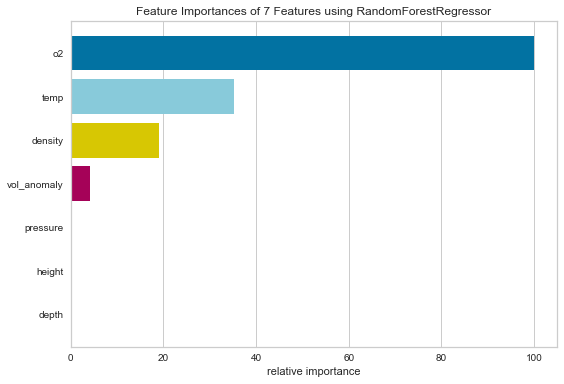

In [266]:
see_feature_importance(water_train, y_train, forest_rg)

According to the visual, in exception of oxygen saturation, temperature of the water, and density the rest of the features are not contributing to the model heavily, and ca be safely removed to help with much easier to interpret the model. This is perfect because earlier I had a suspicious that some of the extra variables were highly correlated, which gives me a confidence to exclude them from the model now

## Evaluating the test set

After all the work, it's the time to evaluate the model on the test set and see how it performs

In [299]:
final_pred = forest_rg.predict(X_test_rdy)

In [300]:
final_rmse = mean_squared_error(y_test, final_pred,
                               squared=False)

In [301]:
final_rmse

0.07600905082764896

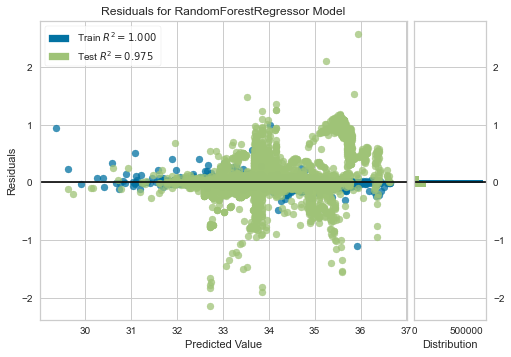

<AxesSubplot:title={'center':'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [305]:
res_plot = ResidualsPlot(forest_rg)

res_plot.fit(water_train, y_train)  
res_plot.score(X_test_rdy, y_test)  
res_plot.show()                 

There seem that our residuals for test set are larger, more dispersed, and exhibit issues of homoscadacity with interesting patterns that suggest some underlying issues. I'd like to further understand what might have caused to display such curving patterns. Since the rmse is so small, perhaps forest regression accounts for that variation, but then again, why are residuals looking that way, and r^2 seems so... perfetct?

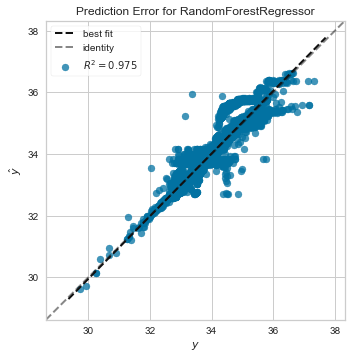

<AxesSubplot:title={'center':'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [307]:
pred_error = PredictionError(forest_rg)

pred_error.fit(water_train, y_train)  
pred_error.score(X_test_rdy, y_test)  
pred_error.show()                 

Looking at the prediction errors we can conclude that we've done a really good job since the 45 degree line of actual fit is nearly an identical match, however, some of the residuals seem to have a trend